In [655]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pymongo import MongoClient
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
import os, sys
from time import time
import warnings

In [656]:
warnings.filterwarnings('ignore')
client = MongoClient(username='myUserAdmin', password='abc123')
db = client.Amazon
collection = db.reviews_Electronics
data = collection.count()
data

7824482

In [657]:
data = pd.DataFrame(list(collection.find().limit(50000)))

In [ ]:
client1 = MongoClient()
db1 = client1.Amazon
collection = db['mate_Electronics']
data1 = collection.count()
data2 = pd.DataFrame(list(collection.find().limit(50000)))
data2.drop(['_id'],1, inplace=True)
data2.head()
data2.drop(['brand','imUrl','price','salesRank'],1, inplace=True)

In [ ]:
#data2.drop(['_id'],1, inplace=True)
data2.count()

## Performing the tokenization and then trying to filter the data to  develop a dataset ready for a classification data

In [ ]:
data_merge = pd.merge(data, data2, on='asin',how='left', left_on=None, right_on=None, left_index=False,sort=True)
#data.sort_values(by = data.unixReviewTime.tolist(),axis=0, ascending = True, kind='mergesort')
#d.merge_asof(data,data2, on='asin', allow_exact_matches=False)
#)data_merge.head()
#data_merge.count()

In [ ]:
# data_merge.drop(['_id'], 1, inplace=True)
# data2.drop(['_id'],1, inplace=True)

In [ ]:
import random
#random.shuffle(data_merge)
data7 = data_merge.sample(n=10000)
data7.head()
#a =data7.loc[data['asin'] == 'B00000JDHV']
d = data7.reviewText.tolist()
z = data7.summary.tolist()
y = data7.overall.tolist()
asin = data7.asin.tolist()
data7.head()

In [ ]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize, sent_tokenize
#stop_word = set(stopwords.words("english"))
# # for i in stop_word:
# #     print(i)
# token_a = []
# for i in a:
#     token_a.append(sent_tokenize(i))
# #print((token_a[1][:10]))
#c = c[:3]
#print(a[1])

def tokenizing(a):
    filter_sentence=[]
    for i in range(len(a)):
        example_sentence = str(a[i])
        stop_word = set(stopwords.words("english"))
        words = word_tokenize(example_sentence)
        temp = []
        for w in words:
            x = " "
            if w in stop_word:
                words.remove(w)    
                x = ''.join(w)
            else:
                x = ''.join(w)
            #print(x)
            temp.append(x)
        filter_sentence.append(temp)
    final_output = []
    for x in range(len(filter_sentence)):
        a = " "
        for i in filter_sentence[x]:
            a+=" "+i
        final_output.append(a)
    return(final_output)
token_ouptut = tokenizing(d)
token_summary = tokenizing(z)
print(len(token_summary))

In [ ]:
print(token_ouptut[:10])
print(token_summary[0])

In [ ]:
def token_words(a):
    words1 = []
    filter_sentence=[]
    for i in range(len(a)):
        example_sentence = str(a[i])
        words = word_tokenize(example_sentence)
        words1.append(words)
    return(words1)
print(len(token_words(d)))
print(token_words(d))

In [561]:
y = data7.overall.tolist()
asin = data7.asin.tolist()
id_score_mapper = []
for i in range(len(y)):
    id_score_mapper.append([asin[i], y[i]])

def Overall_low_score_category(a):
    low_score = []
    for i in a:
        if i[1] >=0 and i[1] <=2.49:
            low_score.append(i)
    return(low_score)
def Overall_medium_score_category(a):
    medium_score = []
    for i in a:
        if i[1] >=2.5 and i[1] <=3.99:
            medium_score.append(i)
    return(medium_score)

def Overall_high_score_category(a):
    high_score = []
    for i in a:
        if i[1] >=4:
            high_score.append(i)
    return(high_score)
q1 = len(Overall_low_score_category(id_score_mapper))
q2 =len(Overall_high_score_category(id_score_mapper))
q3 = len(Overall_medium_score_category(id_score_mapper))
Q= [q1, q2, q3]
print(Q)

[1658, 7533, 809]


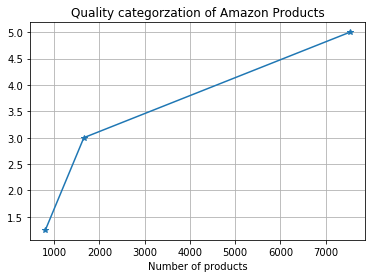

In [594]:
#Histogram of the categorizing the quality of the products based on the overall score
plt.title("Quality categorzation of Amazon Products")
plt.xlabel("Number of products")
y1 = [1.25, 3.0, 5.0]
Q.sort()
plt.grid()
plt.plot(Q,y1, marker='*')
plt.show()

In [ ]:
print(helpful[1])

In [ ]:
token_ouptut_data_frame = pd.DataFrame(token_ouptut)
token_ouptut_data_frame.to_csv(path_or_buf = 'review_classify.csv')

In [ ]:
token_ouptut[:11]

In [ ]:
def review_classify(sentence, plot=True):
    
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank
    tokenizer = treebank.TreebankWordTokenizer()
    
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower()for word in tokenizer.tokenize(sentence)]
    x = list(range(len(tokenized_sent)))
    y = []
    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words+=1
            y.append(1) #positive
        elif word in opinion_lexicon.negative():
            neg_words+=1
            y.append(-1) #negative
        else:
            y.append(0) #neutral
    if pos_words > neg_words:
        pos_score = float(pos_words/len(y))
        neg_score = float(neg_words/len(y))
        return[sentence,'Positive', pos_score, neg_score]
    elif pos_words < neg_words:
        pos_score = float(pos_words/len(y))
        neg_score = float(neg_words/len(y))
        return[sentence,'Negative',pos_score, neg_score]
    else:
        return[sentence,'Neutral', 0.0]
    if plot==True:
        _show_plot(x,y, x_labels=tokenized_sent, y_labels=['Negative', 'Neutral', 'Positive'])   

In [558]:
from collections import defaultdict
polarity_4 = list()
a = token_summary[:5]
random.shuffle(token_summary)
s = token_summary[:5]
#s = token_ouptut[:10000]
for i in range(len(s)):
    polarity_4.append(review_classify(token_summary[i]))
#print(polarity_4)
data_1 = pd.DataFrame(polarity_4)
data_1.head()

,0,1,2,3
0,Did n't charge my IdeaTab A2109 tablet,Neutral,0.0,NaN
1,returned it,Neutral,0.0,NaN
2,"Nice product , bad service",Neutral,0.0,NaN
3,nice !,Positive,0.5,0.0
4,Does the,Neutral,0.0,NaN


In [559]:
# polarity_1 = polarity.copy()
# polarity_1.drop(polarity_1.columns[[0, 1]], axis=1)
# polarity_1.to_csv(path_or_buf = 'polarity_review.csv')
polarity_4 = pd.DataFrame(polarity_4)
polarity_4.to_csv(path_or_buf = 'polarity_review_summary.csv')
polarity_4.head(10)

,0,1,2,3
0,Did n't charge my IdeaTab A2109 tablet,Neutral,0.0,NaN
1,returned it,Neutral,0.0,NaN
2,"Nice product , bad service",Neutral,0.0,NaN
3,nice !,Positive,0.5,0.0
4,Does the,Neutral,0.0,NaN


In [549]:
#polarity_2 = pd.read_csv('polarity_review.csv')
polarity_4 = pd.read_csv('polarity_review.csv')
#polarity_2.drop(polarity_2.columns[[0,1,2]], axis=1)

In [602]:
polarity_2.drop(polarity_2.columns[[0,1,2]], axis=1)
polarity_2.replace('NaN', -9999, inplace = True)
polarity_2.replace('nan', -9999, inplace = True)
polarity_2['negative_score'].fillna(0, inplace=True)
polarity_2.head()

,Unnamed: 0,,.1,review_text,polarity_value,positive_score,negative_score
0,2,2,2,"I just this . The picture is good , but of m...",Positive,0.071429,0.000000
1,3,3,3,The coupler ( ACC-017-015 FA410 ) plug that ...,Negative,0.000000,0.054054
2,4,4,4,If you a of that studio quality sound and do...,Positive,0.054054,0.000000
3,5,5,5,This unit has perfectly in a & # 34 ; TV in ...,Positive,0.083333,0.041667
4,6,6,6,We got one of so would n't have run a throug...,Positive,0.100000,0.033333


###  Predicting the polarity of the review using trained data set using logistic regression

In [527]:
from sklearn.linear_model import LogisticRegression
polarity_1.drop(polarity_1.columns[[0,1,2]], axis=1)
X = np.c_[polarity_2.positive_score.tolist(), polarity_2.negative_score.tolist()]
#print(X)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(polarity_2.polarity_value.tolist())
a2= le.transform(polarity_2.polarity_value.tolist())
y = np.array(polarity_2.polarity_value.tolist())
#print(y)
from sklearn.cross_validation import train_test_split
RAN_STATE=42
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.9, random_state = 4)
clf =LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("measured accuracy: ", accuracy*100)
example_measures = np.array([[0.10, 0.995]])
x = len(example_measures)
example_neasures = example_measures.reshape(x,-1)
prediction = clf.predict(example_measures)
print(prediction)

measured accuracy:  71.870135646
['Positive']


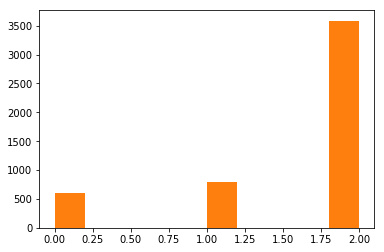

In [639]:
#Classfication of the reviews into positive negative and neutral
polarity_2['polarity_value'] = polarity_2['polarity_value'].astype('category')
polarity_2['Encoded_polarity'] = polarity_2['polarity_value'].cat.codes
polarity_2.head()
df1 = polarity_2.iloc[:,1]
df2 = polarity_2.Encoded_polarity.tolist()
plt.hist(df2)
plt.show()

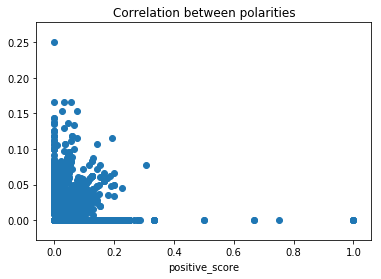

In [647]:
plt.scatter(polarity_2.positive_score.tolist(),polarity_2.negative_score.tolist())
plt.xlabel("positive_score")
#plt.ylabel("negative_score")
plt.title("Correlation between polarities")
plt.show()

In [ ]:
print(len(a))

### Classifying the review text as helpful and not helpful

In [203]:
data.drop(['_id'],1, inplace=True)
data.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0132793040,"[1, 1]",5.0,Corey Barker does a great job of explaining Bl...,"04 13, 2013",AKM1MP6P0OYPR,"Vicki Gibson ""momo4""",Very thorough,1365811200
1,0439886341,"[4, 4]",1.0,Do not waste your money on this thing it is te...,"04 18, 2012",A1GI0U4ZRJA8WN,Truthfull,TERRIBLE DONT WASTE YOUR MONEY,1334707200
2,0511189877,"[0, 0]",5.0,Dog got the old remote and destroyed it. Didn...,"04 14, 2014",A1QGNMC6O1VW39,CK,Works Great with my TWC box,1397433600
3,0321732944,"[0, 0]",5.0,While many beginner DVDs try to teach you ever...,"07 1, 2012",A2CX7LUOHB2NDG,Bernie,Adobe Photoshop CS5 Crash Course with master P...,1341100800
4,0511189877,"[0, 1]",5.0,We had an old Time Warner Cable remote that wa...,"03 27, 2014",A2TY0BTJOTENPG,Johnny Exx,Excellent replacement to Time Warner Cable remote,1395878400


In [205]:
dh1 = data.loc[:,['overall','reviewText','helpful','reviewerID']]
dh1['num_helpful'] = dh1['helpful'].apply(lambda x: x[0])
dh1['denom_helpful'] = dh1['helpful'].apply(lambda x: x[1])
del dh1['helpful']
print(dh1.isnull().sum())

overall          0
reviewText       0
reviewerID       0
num_helpful      0
denom_helpful    0
dtype: int64


In [206]:
dh1.describe()

,overall,num_helpful,denom_helpful
count,50000.00000,50000.000000,50000.000000
mean,4.03524,5.921440,6.989840
std,1.35555,21.311627,22.596074
min,1.00000,0.000000,0.000000
25%,4.00000,0.000000,0.000000
50%,5.00000,1.000000,1.000000
75%,5.00000,4.000000,5.000000
max,5.00000,1556.000000,1591.000000


In [386]:
import nltk
import seaborn as sns

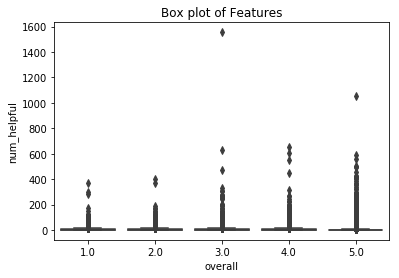

In [396]:
#plt.figure(figsize=FIG_SIZE)
plt.title('Box plot of Features')
plt.ylabel('Spread')
plt.xlabel('Features')
display(sns.boxplot(y ='num_helpful', x='overall', data=dh1))
plt.show()

In [208]:
print(dh1['num_helpful'].idxmax(axis=0, skipna=True))
print(dh1['denom_helpful'].idxmax(axis=0, skipna=True))

48816
48816


In [209]:
dh1.iloc[[48814, 48814]]

,overall,reviewText,reviewerID,num_helpful,denom_helpful
48814,3.0,This lens is great for portraits if you have v...,AP1M9LIIT0K3R,0,1
48814,3.0,This lens is great for portraits if you have v...,AP1M9LIIT0K3R,0,1


In [210]:
dh2 = dh1[(dh1.denom_helpful >3)].copy()
dh2.shape

(16005, 5)

In order to perform our analysis, we classify the review as helpful and not hepful. We need to map a way to perform this binary classification. The chosen method is to use a threshold of ratio of helpfulness of the review to people  on the web. In order to deal with large data we have out a threshold on the ratio of erview ness used for the study which is  greater the 0.6 which states the review as helpful otherwise not. 

In [595]:
#transform Helpfulness into a binary variable with 0.50 ratio
import numpy as np
print(dh1['num_helpful'].count())
print(dh1['num_helpful'].count())

threshold = 0.6
dh2.loc[:,'Helpful1'] = np.where(dh2.loc[:,'num_helpful'] / dh2.loc[:,'denom_helpful'] > threshold,1,0)
dh2.head(3)

50000
50000


,overall,reviewText,reviewerID,num_helpful,denom_helpful,Helpful1
1,1.0,do not waste your money on this thing it is te...,A1GI0U4ZRJA8WN,4,4,1
11,1.0,"i'm a professional otr truck driver, and i bou...",AMO214LNFCEI4,12,15,1
12,4.0,this is a great truck gps. i've tried others a...,A28B1G1MSJ6OO1,21,22,1


16005
16005


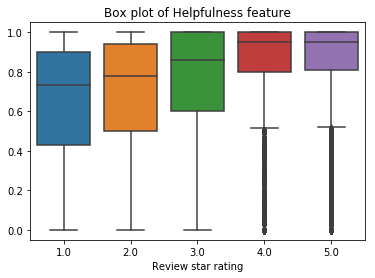

In [597]:
A = np.array(dh2.loc[:,'num_helpful'] / dh2.loc[:,'denom_helpful']).tolist()
B = dh2.overall.tolist()
print(len(A))
print(len(B))
plt.title('Box plot of Helpfulness feature')
plt.ylabel("Number of products")
plt.xlabel('Review star rating')
display(sns.boxplot(x=B, y=A))
plt.show()

191


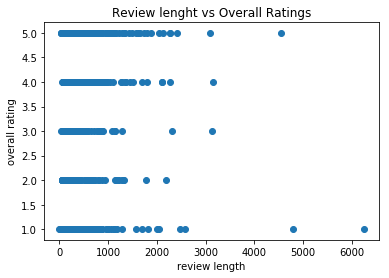

In [525]:
C = polarity_2
#print(len(C[1]))
d = C.review_text.tolist()
print(len(d[0]))
r = B[:1000]
a5 = d[:1000]
a6 = []
for i in a5:
    a6.append(len(i))
plt.scatter(x=a6, y =r)
plt.xlabel("review length")
plt.ylabel("overall rating")
plt.title("Review lenght vs Overall Ratings")
plt.show()

In [212]:
dh2.head(3)

,overall,reviewText,reviewerID,num_helpful,denom_helpful,Helpful1
1,1.0,Do not waste your money on this thing it is te...,A1GI0U4ZRJA8WN,4,4,1
11,1.0,"I'm a professional OTR truck driver, and I bou...",AMO214LNFCEI4,12,15,1
12,4.0,This is a great truck GPS. I've tried others a...,A28B1G1MSJ6OO1,21,22,1


In [213]:
#check the balance
print('Count:')
display(dh2.groupby('Helpful1').count())

Count:


,overall,reviewText,reviewerID,num_helpful,denom_helpful
Helpful1,,,,,
0,3070,3070,3070,3070,3070
1,12935,12935,12935,12935,12935


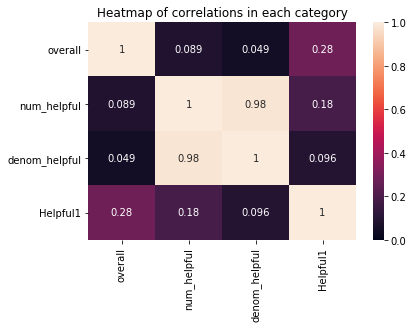

In [395]:
#Visualize the correlation of the data
import sys, os
sys.path.append("./matplotlib/")
sys.path.append("./seaborn/")
correlations = dh2.corr()
#figure.FIGURE(figsize = FIG_SIZE)
plt.title("Heatmap of correlations in each category") 
sns.heatmap(correlations, vmin=0, vmax=1, annot=True)
plt.show()

### Text Feature Generation for Benchmark model

In [217]:
from string import *
dh2.loc[:, 'reviewText']= dh2['reviewText'].str.lower()
def remove_punctuation(text):
    return text.translate(string.punctuation.translate('"'))
dh2['reviewText']=dh2['reviewText'].apply( lambda x: remove_punctuation(x))
dh2['reviewText'].head(4)
print(dh2['reviewText'])

1        do not waste your money on this thing it is te...
11       i'm a professional otr truck driver, and i bou...
12       this is a great truck gps. i've tried others a...
13       well, what can i say.  i've had this unit in m...
14       not going to write a long review, even thought...
15       my brother is a trucker and pre-ordered this. ...
17       i did a lot of comparison shopping and decided...
22       excellent. best truck gps i've used. good grap...
24       well as one of the first to get this i figured...
31       this gps rocks!! dont even bother with other q...
45       twice this item has turned into a useless bric...
46       dont waist your money on this product my cell ...
87       adapter does not work from the begining.it is ...
89       this is great now i can watch the movies from ...
114      same charger can be bought at barnes & noble f...
125      go to target or barnes and noble instead, and ...
138      this was the wrong power kit.  i had to return.

In [215]:
#tokenizing text with Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

import os
#create a stemmer calling the class Snowball Stemmer
stemmer = SnowballStemmer("english")

def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

#define our own tokenizing function that we will pass into the TFIDFVectorizer. 
#We will also stem the words here.

if os.path.exists('features.pickle'):
    print('Pickled file alredy present, loading....')
    features = pickle.load(open("features.pickle", "rb"))
    print('Pickle file loaded.')
else:
    #define the vectorizer
    vectorizer = TfidfVectorizer(tokenizer = tokens, 
                                 stop_words = 'english', ngram_range=(1,1), min_df = 0.1)
    #fit the vectorizers to the data.
    features = vectorizer.fit_transform(dh2['reviewText'])
(features)

<16005x55 sparse matrix of type '<class 'numpy.float64'>'
	with 147900 stored elements in Compressed Sparse Row format>

In [335]:
from sklearn.cross_validation import train_test_split
X = (features)
y = np.c_[dh2.Helpful1.tolist()]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [377]:
from sklearn.metrics import roc_auc_score, roc_curve
import time
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''   
    clf.fit(X_train, y_train)
    print ("Trained model..!!!")
  
# def predict_labels(clf, features, target):
#     ''' Makes predictions using a fit classifier based on roc_auc score. '''    
#     probas = clf.predict_proba(features)
#     return roc_auc_score(target.values, probas[:,1].T)

def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on roc_auc score. '''
    # Train the classifier
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, X_train.shape[0]))
    train_classifier(clf, X_train, y_train)
    print("Below is the ROC auccuracy score of the trained classifier: ")
    print(clf_test_roc_score(clf, X_train, y_train, X_test, y_test))
    # Print the results of prediction for both training and testing
    #print ("ROC_AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    #print ("ROC_AUC score for test set: {:.4f}.\n".format(predict_labels(clf, X_test, y_test)))
    
def clf_test_roc_score(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    probas = probas =clf.predict_proba(X_test)
    return roc_auc_score(y_test, probas[:,1].T)

In [409]:
# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(),  
            RandomForestClassifier(random_state = RAN_STATE), 
            LogisticRegression(random_state = RAN_STATE),
            DecisionTreeClassifier(random_state = RAN_STATE),
           SVC(random_state = RAN_STATE, kernel='linear', probability=True)]
x_tr = X_train.toarray()
x_te = X_test.toarray()


# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:5000],x_tr[0:10000],x_tr[:15000], x_tr]
train_target_list = [y_train[0:5000], y_train[0:10000], y_train[:15000], y_train]


# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        train_predict(clf, a, b, x_te, y_test)

Training a GaussianNB using a training set size of 5000. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.628695343417
Training a GaussianNB using a training set size of 10000. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.632902359455
Training a GaussianNB using a training set size of 12804. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.635881109381
Training a GaussianNB using a training set size of 12804. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.635881109381
Training a RandomForestClassifier using a training set size of 5000. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.62156686716
Training a RandomForestClassifier using a training set size of 10000. . .
Trained model..!!!
Below is the ROC auccuracy score of the trained classifier: 
0.658566259007
Training a RandomForestClassifier usi

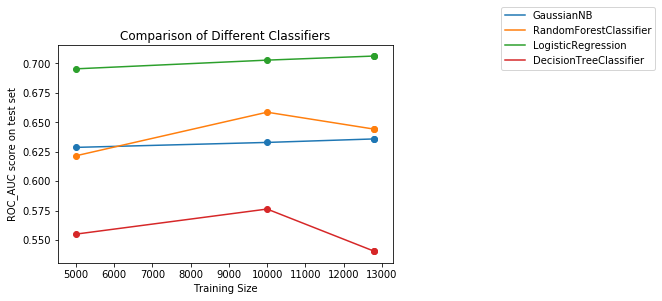

In [399]:
for clf in clf_list:
    x_graph = []
    y_graph = []
    for a, b in zip(train_feature_list, train_target_list):
        y_graph.append(clf_test_roc_score(clf, a, b, x_te, y_test))
        x_graph.append(len(a))
    plt.scatter(x_graph,y_graph)
    plt.plot(x_graph,y_graph, label = clf.__class__.__name__)
FIG_SIZE = (14,8)
plt.title('Comparison of Different Classifiers')
plt.xlabel('Training Size')
plt.ylabel('ROC_AUC score on test set')
plt.legend(bbox_to_anchor=(1.8, 1.20))
#plt.figure(figsize=FIG_SIZE)             
plt.show()

In [ ]:
clf6 = SVC(random_state = RAN_STATE, kernel='linear', probability=True)
clf6.fit(X_train,y_train)
probas = clf6.predict_proba(X_test)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TF IDF')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE) 
plt.show()

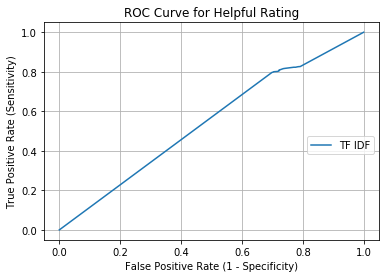

In [405]:
clf5 = DecisionTreeClassifier()
clf5.fit(X_train,y_train)
probas = clf5.predict_proba(X_test)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TF IDF')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE) 
plt.show()

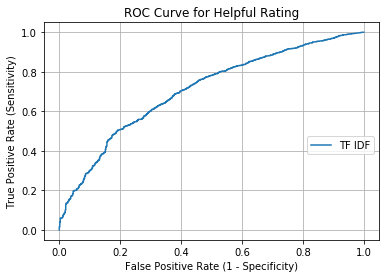

In [403]:
clf3 = LogisticRegression()
clf3.fit(X_train,y_train)
probas = clf3.predict_proba(X_test)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TF IDF')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE) 
plt.show()

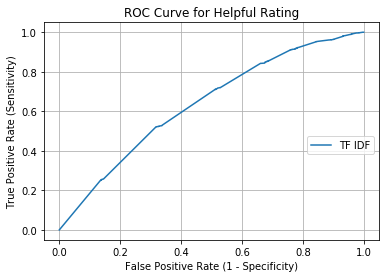

In [402]:
clf4 = RandomForestClassifier()
clf4.fit(X_train,y_train)
probas = clf4.predict_proba(X_test)
plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label = 'TF IDF')
plt.title('ROC Curve for Helpful Rating')
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(bbox_to_anchor=(1.0, .5))
plt.figure(figsize=FIG_SIZE) 
plt.show()

###  Cosine similarity matrix for checking the pattern of a particular review for a particular product by comparing it with rest of the review for that product
(Reference:http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

In [440]:
cosine_data = data_merge.loc[data_merge['asin'] == 'B00004TJ0L']
review_list = cosine_data.reviewText.tolist()
print(len(review_list))
cosine_data.head()
labels = cosine_data.reviewerID.tolist()

21


In [453]:
def Cosine_similarity(a_list, i):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity
    import math 
    vector_tfid = TfidfVectorizer()
    matrix_vector_tfid = vector_tfid.fit_transform(a_list)
    print(matrix_vector_tfid.shape)
    return(cosine_similarity(matrix_vector_tfid[:i], matrix_vector_tfid))

In [459]:
cos_similarity = Cosine_similarity(review_list,21)

(21, 414)


In [460]:
cos_similarity[2]

array([ 0.16555146,  0.25309757,  1.        ,  0.13718191,  0.01485614,
        0.15022291,  0.09478452,  0.18011462,  0.26931071,  0.19595474,
        0.10448577,  0.17212721,  0.06675802,  0.10296184,  0.05797174,
        0.16490913,  0.17872508,  0.08517763,  0.20611951,  0.1559673 ,
        0.06513522])

In [653]:
def cosine_angle(cos_a): 
    import math
    cos_angle = list()
    for i in cos_a:
        for j in i:
            angle_in_radians = math.atan(j)
            angle_in_degree = math.degrees(angle_in_radians)
            cos_angle.append(angle_in_degree)
    return(cos_angle)

In [654]:
cosine_angle(cos_similarity)

ValueError: math domain error

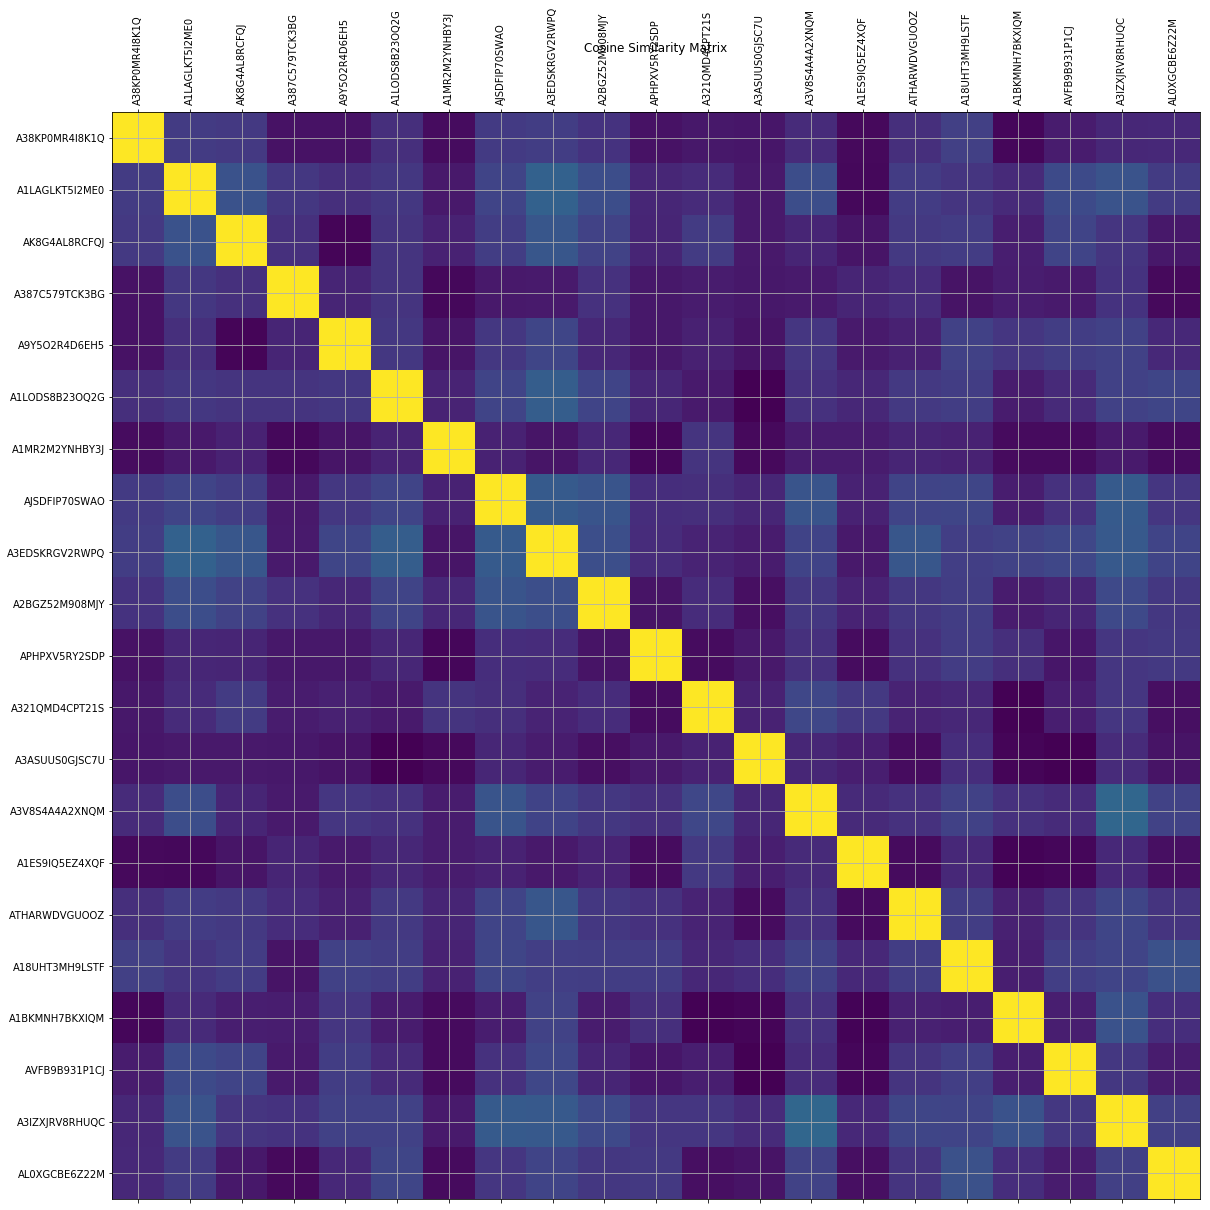

In [474]:
##plotting similarity matrix for a particular review in specifc to te product
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,20))
ax.grid(True)
cax = ax.matshow(cos_similarity, interpolation='nearest')
plt.xticks(range(21), labels,rotation=90 )
plt.yticks(range(21), labels)
plt.title('Cosine Similarity Matrix')
plt.show()